In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Importing the csv from the Event Viewer mmc proved to be a challenge. It would return the Level and Date/Time columns merged and I had no way of working with the Level column alone. I deceided to open the csv in excel and save it as xlsx instead and then use the read_excel(). Voila!

In [86]:
events = pd.read_excel('win_event_log.xlsx')

## Just Checking the Data Set

In [87]:
events.head()

,Level,Date and Time,Source,Event ID,Task Category,Unnamed: 5
0,Information,2020-05-03 10:56:09,ESENT,916.0,General,"svchost (27956,G,98) The beta feature EseDiskF..."
1,Information,2020-05-03 10:50:21,HotKeyServiceUWP,0.0,-2,The description for Event ID 0 from source Hot...
2,Information,2020-05-03 10:50:20,HotKeyServiceUWP,0.0,-2,The description for Event ID 0 from source Hot...
3,Information,2020-05-03 10:47:46,ESENT,916.0,General,"svchost (27272,G,98) The beta feature EseDiskF..."
4,Information,2020-05-03 10:39:09,ESENT,916.0,General,"svchost (1560,G,98) The beta feature EseDiskFl..."


In [88]:
events.describe()

,Event ID
count,27666.000000
mean,1270.406239
std,2814.320906
min,0.000000
25%,3.000000
50%,916.000000
75%,1001.000000
max,26214.000000


## Plotting the counts of each event level/type

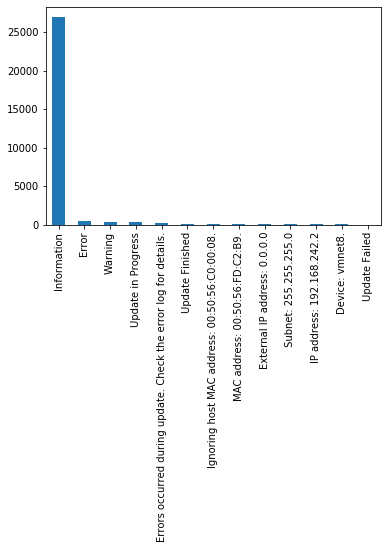

In [89]:
el = events['Level'].value_counts()
el.plot(kind='bar')

## Reformatting the columns

In [90]:
events.columns

Index(['Level', 'Date and Time', 'Source', 'Event ID', 'Task Category',
       'Unnamed: 5'],
      dtype='object')

### Using List comprehension to ease the process of converting columns to lower case

In [91]:
events.columns = [col.lower() for col in events] #convert all columns to lovercase

In [92]:
events.columns

Index(['level', 'date and time', 'source', 'event id', 'task category',
       'unnamed: 5'],
      dtype='object')

In [22]:
events.rename(columns={'time stamp':'time_stamp'}, errors='raise', inplace=True)
#customise column names

In [17]:
events.columns

Index(['level', 'time stamp', 'source', 'event_id', 'task_category',
       'description'],
      dtype='object')

### I needed to group events by month but the timestamp field was unique for each row. After looking at the format of the time_stamp values I noticed a pattern and decided to slice column to get the first 7 characters which would include only the month and year. The column needed to be converted to string though, because it was in date format.

In [23]:
events.head(2)

,level,time_stamp,source,event_id,task_category,description
0,Information,2020-05-03 10:56:09,ESENT,916.0,General,"svchost (27956,G,98) The beta feature EseDiskF..."
1,Information,2020-05-03 10:50:21,HotKeyServiceUWP,0.0,-2,The description for Event ID 0 from source Hot...


In [33]:
events['month'] = events.time_stamp.astype(str)
events.head(2)

,level,time_stamp,source,event_id,task_category,description,month
0,Information,2020-05-03 10:56:09,ESENT,916.0,General,"svchost (27956,G,98) The beta feature EseDiskF...",2020-05-03 10:56:09
1,Information,2020-05-03 10:50:21,HotKeyServiceUWP,0.0,-2,The description for Event ID 0 from source Hot...,2020-05-03 10:50:21


In [37]:
events['month'] = month.str.slice(start=0, stop=7, step=1)

In [41]:
em = events['month'].value_counts()

## Plot all events by month

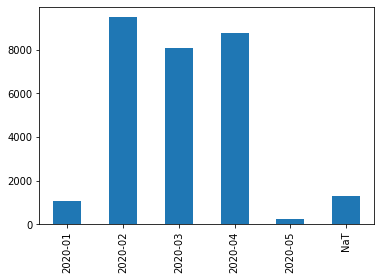

In [45]:
em.sort_index().plot(kind = 'bar') #sort_index() to make sure the x axis is ordered by ascending month

In [50]:
month.str.slice(start=5, stop=7)

0        05
1        05
2        05
3        05
4        05
         ..
28959    01
28960    01
28961    01
28962    01
28963    01
Name: time_stamp, Length: 28964, dtype: object

In [72]:
err = events[(events['level'] == 'Error')]

## Plot only error events by month

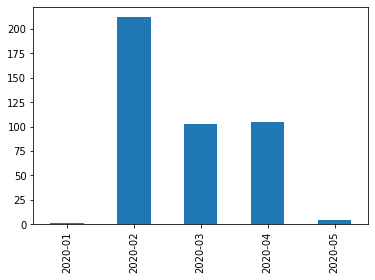

In [78]:
err['month'].value_counts().sort_index().plot(kind='bar')

## Plot all events by month superimposed

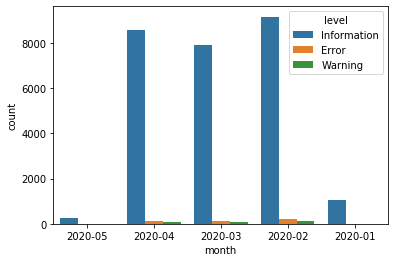

In [84]:
events.dropna(inplace=True)
sb.countplot(x='month', data=events, hue='level')